In [1]:
import detectron2
from detectron2.utils.visualizer import ColorMode
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.config import get_cfg

from detectron2.utils.visualizer import Visualizer
from detectron2 import model_zoo

import os
import IPython


from segmentation_model.train_net import BasePredictor as bp
from segmentation_model.visualizer import Basevisualizer
from common import dictionary_utils
from common import coco_utils
from config import settings as st
from config import config

## Inference for 800 x 800 

* v_Jan_Mar

In [12]:
%load_ext tensorboard
%tensorboard --logdir output/output_119_224_R_101_C4_6_v_whole_summer_winter_2020_resampling_factor0.001_0.001_freeze_at2 --host localhost

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6013 (pid 846668), started 2:11:36 ago. (Use '!kill 846668' to kill it.)

In [2]:
path = os.path.join(st.data_directory,str(config.test_version_),config.test_year + '_processed',config._test_version_name,str(config.test_image_size))
register_coco_instances("veg_train_dataset", {}, os.path.join(path,config._version_train_,'annotation','train2020.json') ,os.path.join(path,config._version_train_,'images'))
register_coco_instances("veg_val_dataset", {}, os.path.join(path,config._version_validation_,'annotation','val2020.json') ,os.path.join(path,config._version_validation_,'images'))

In [3]:
field_metadata = MetadataCatalog.get("veg_train_dataset")
print(field_metadata)

Metadata(evaluator_type='coco', image_root='/home/sami02/projects/thesis/Data/1/2020_processed/v_whole_summer_winter_2020/800/train/images', json_file='/home/sami02/projects/thesis/Data/1/2020_processed/v_whole_summer_winter_2020/800/train/annotation/train2020.json', name='veg_train_dataset')


In [4]:
cfg = get_cfg()
output_path = os.path.join('output', config._test__model_)
cfg.merge_from_file(os.path.join(output_path, 'config.yaml'))
cfg.DATASETS.TEST = ("veg_train_dataset",)
# cfg.MODEL.DEVICE = "cpu"
cfg.MODEL.WEIGHTS = os.path.join(output_path, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
# trainer = bt(cfg)
predictor = bp(cfg)

In [8]:
import cv2
import matplotlib.pyplot as plt
im = cv2.imread(os.path.join(path,config._version_train_,'images','COCO_train2021_000000100148.jpg'))
outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format


In [9]:
outputs

{'instances': Instances(num_instances=0, image_height=800, image_width=800, fields=[pred_boxes: Boxes(tensor([], device='cuda:0', size=(0, 4))), scores: tensor([], device='cuda:0'), pred_classes: tensor([], device='cuda:0', dtype=torch.int64), pred_masks: tensor([], device='cuda:0', size=(0, 800, 800), dtype=torch.uint8)])}

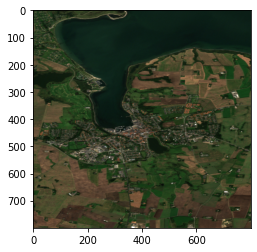

In [10]:
from segmentation_model.visualizer import Basevisualizer as viz
v = viz(im[:, :, ::-1],
                metadata=field_metadata, 
                scale=1, 
#                 instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
# cv2_imshow(out.get_image()[:, :, ::-1])
im_rgb = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

In [8]:
cv2.imwrite('s.jpg',im_rgb)

True

In [7]:
outputs['instances']

Instances(num_instances=63, image_height=800, image_width=800, fields=[pred_boxes: Boxes(tensor([[1.0705e+02, 4.0598e+02, 1.9193e+02, 4.7642e+02],
        [1.7546e+02, 6.0282e+02, 2.6428e+02, 6.5497e+02],
        [6.8266e+02, 0.0000e+00, 7.2841e+02, 2.1303e+01],
        [2.9859e+02, 8.3523e+00, 3.6961e+02, 5.4211e+01],
        [7.1094e+02, 5.5194e+02, 7.7204e+02, 5.9191e+02],
        [2.7810e+02, 5.2936e+02, 3.4402e+02, 6.0231e+02],
        [4.5292e+02, 1.7322e+02, 4.9776e+02, 1.9664e+02],
        [0.0000e+00, 6.6488e+02, 5.7764e+01, 7.1393e+02],
        [5.8808e+02, 4.7112e+02, 6.5077e+02, 5.2866e+02],
        [6.9852e+02, 5.9302e+02, 7.8445e+02, 6.3132e+02],
        [2.5506e+02, 6.1311e+02, 3.4898e+02, 6.6937e+02],
        [5.8346e+02, 2.4612e+02, 6.8281e+02, 2.7413e+02],
        [8.4569e+01, 6.2929e+02, 1.7764e+02, 6.9942e+02],
        [4.4484e+02, 7.7599e+01, 5.3212e+02, 1.2704e+02],
        [4.2954e+02, 5.9377e+02, 5.1509e+02, 6.2568e+02],
        [8.1298e+01, 4.7217e+02, 1.9078e+